In [ ]:
from hashlib import new
#from typing import List
import matplotlib.pyplot as plt
import math as m
import numpy as np
import random as rd
import pandas as pd
import timeit


In [ ]:
L_str = []
L_int = []


file = open("tsp.txt",'r')
lines = [line.strip() for line in file]

for line in lines:
    L_str = line.split(', ')
    L_int.append((float(L_str[0]),float(L_str[1])))


FileNotFoundError: ignored

In [ ]:
#This one is  just doing a shuffle lol
def random_list(L_int):
    rd.shuffle(L_int)
    return L_int

In [ ]:
#This Function creates a new poppultion of size of pop, These are all random numbers 
def createPop(PopSize, List):
    pop=[]
    for i in range(0,PopSize):
        pop.append(list(random_list(List)))
    return pop

In [ ]:
#This  function takes in a list and return a distance 
def distance(L):
    S=0
    for i in range(len(L)-1):
        xy1=L[i]
        xy2=L[i+1]
        S+= ((xy2[0]-xy1[0])**2+(xy2[1]-xy1[1])**2)**(0.5)
    return S


In [ ]:
#Here we will select the top 50% of the population. Because we are Boujee Like that 💅🏻✨
def MatePoolSelect(List,popsize):
    n=int(popsize/2)
    L=np.array(List)
    
    dist=[]
    distnew=[]
    for i in range(0, popsize):
        dist.append((distance(L[i]),i))
    #print(dist[4])
    df = pd.DataFrame(dist, columns = ['Distance','Index'])
    m=df.sort_values(["Distance"], ascending=True)
    miaw=m.head(n)
    b=miaw.iloc[:,1:].values.T
    for i in range(0,n):
      distnew.append(List[b[0,i]])
    print(miaw)
    



    return distnew

In [ ]:
#Here we will do single point cross over breeding for the population of better adults after we are done killing off the useless people 🥱
def breed(List1,List2):
  bachamain1=[]
  bacha1=[]
  bacha2=[]
  
  
  a= int(rd.random()* len(List1))
    


  for i in range(a,len(List1)):
    bacha1.append(List1[i])

  
  for i in List2 :
    if i not in bacha1:
      bacha2.append(i)


  bachamain1 =bacha1+bacha2


  return bachamain1 

def newchildren(Population,popsize):
  childs=[]
  
  for i in range(0, int(popsize/4)):
    k= breed(Population[i],Population[i+1])
    Population.append(k)
  return Population

In [ ]:
#Here we will do Mutation here 🤪

def mutation(List,murate):
  for i in range(len(List)):
    if (rd.random()< murate):
      j= int(rd.random()*len(List))
      ek = List[i]
      dau= List[j]

      List[i]= dau
      List[j]= ek
  
  return List


def MutationFulltoo(Population,mutationrate):
  finalpop=[]
  for i in range(0,len(Population)):
    mutefellow=mutation(Population[i],mutationrate)
    finalpop.append(mutefellow)
  return finalpop


In [ ]:
#Putting All these ladies together 🥰

def Finalfunc(population, popsize, muterate):

  m=MatePoolSelect(population,popsize)
  gula = newchildren(m,popsize)
  gula2= newchildren(gula,popsize)
  Akhri = MutationFulltoo(gula2,muterate)

  
  return Akhri


poppulation=createPop(128,L_int)
poppulation2=createPop(128,L_int)
poppulation3=createPop(128,L_int)
Length=[]
Length2=[]
Length3=[]
Length.append(distance(poppulation[0]))
Length2.append(distance(poppulation2[0]))
Length3.append(distance(poppulation3[0]))
for i in range(0,10000):
  poppulation=Finalfunc(poppulation,128,0.0001)
  poppulation2=Finalfunc(poppulation2,128,0.0001)
  poppulation3=Finalfunc(poppulation3,128,0.0001)
  Length.append(distance(poppulation[0]))
  Length2.append(distance(poppulation2[0]))
  Length3.append(distance(poppulation3[0]))

#plt.plot(Length)



Streaming output truncated to the last 5000 lines.

[64 rows x 2 columns]
     Distance  Index
0           0      0
93          0     93
92          0     92
91          0     91
90          0     90
..        ...    ...
99          0     99
98          0     98
111         0    111
64          0     64
63          0     63

[64 rows x 2 columns]
     Distance  Index
0           0      0
93          0     93
92          0     92
91          0     91
90          0     90
..        ...    ...
99          0     99
98          0     98
111         0    111
64          0     64
63          0     63

[64 rows x 2 columns]
     Distance  Index
0           0      0
93          0     93
92          0     92
91          0     91
90          0     90
..        ...    ...
99          0     99
98          0     98
111         0    111
64          0     64
63          0     63

[64 rows x 2 columns]
     Distance  Index
0           0      0
93          0     93
92          0     92
91          0    

KeyboardInterrupt: ignored

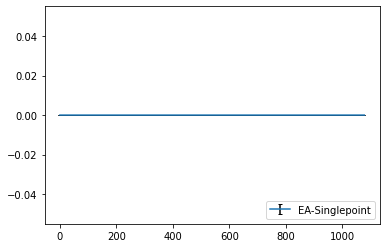

In [ ]:
Y1=Length
Y2=Length2
Y3=Length3

Y=[(Y1[i]+Y2[i]+Y3[i])/3 for i in range(len(Y1))]
Yerr=[max((Y1[i],Y2[i],Y3[i]))-min((Y1[i],Y2[i],Y3[i])) for i in range(len(Y1))]
X = [i for i in range(len(Y1))]
plt.errorbar(X, Y, yerr=Yerr, label='EA-Singlepoint', ecolor='black', capsize=2, errorevery=5)
plt.legend(loc='lower right')
plt.show()
#print(Y1)


In [ ]:
from matplotlib.pyplot import figure
K=poppulation[0]
K = np.array(K)
figure(figsize=(10, 10), dpi=100)
plt.plot(K[:,0],K[:,1])

IndexError: ignored

<Figure size 1000x1000 with 0 Axes>

In [ ]:
np.savetxt("1pointEAShortestY_Values.csv", Y,delimiter =",",fmt ='% s')
np.savetxt("1pointEAShortestYerr_Values.csv", Yerr,delimiter =",",fmt ='% s')

NameError: ignored